##### Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения линейного графика.

Была выбрана задача симуляции полета тела, из точки с координатами $(0,0)$, брошенная под углом $\alpha$ к горизонту, с начальной скоростью $v_0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Уравнение, траектории движения тела по оси $y$:
\begin{equation}
y = x\tan\alpha - \frac{gx^2}{2v_0^2\cos^2\alpha}
\end{equation}

In [2]:
def calc_y(x, v0, a, g):
    return (x * np.tan(a)) - (g * x * x) / (2*(v0**2)*(np.cos(a)**2))

In [3]:
a = float(input("Угол от 0 до 90: "))
v0 = float(input("Начальная скорость: "))

Угол от 0 до 90: 45
Начальная скорость: 20


Устанавливаем значение ускорения свободного падения.

Перводим значения $\alpha$ из градусов в радианы.

А также выситываем длину полета:
\begin{equation}
l = \frac{2v_0^2\sin\alpha\cos\alpha}{g}
\end{equation}
И высоту:
\begin{equation}
h = \frac{v_0^2\sin^2\alpha}{2g}
\end{equation}

In [4]:
g = 9.8
a = np.radians(a)

l = (2 * (v0**2) * np.sin(a) * np.cos(a)) / g
h = (v0**2 * (np.sin(a)**2)) / (2 * g)

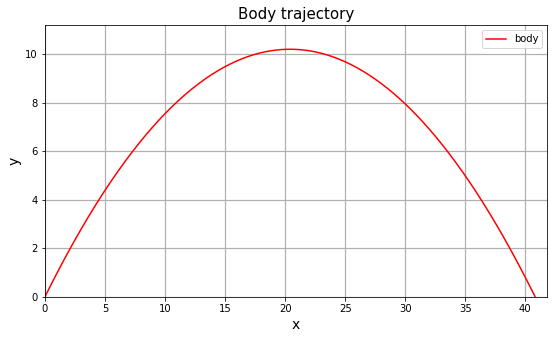

In [5]:
x = np.arange(0, np.ceil(l) + 1, 0.1)
vfunc = np.vectorize(calc_y)
y = vfunc(x, v0, a, g)

x = x[y >= 0]
y = y[y >= 0]

fig, ax = plt.subplots(figsize=(9, 5))

ax.set_xlim(0, l + 1)
ax.set_ylim(0, h + 1)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_title('Body trajectory', fontsize=15)
ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.plot(x, np.abs(y), c="r", label="body",)
ax.legend()
plt.show()